# 베이지안 모수 추정

모수를 추정할 때 가장 가능성(가능도)이 큰 하나의 값을 찾는 것이 아니라 모든 모수 값에 대해 각각의 모수 값이 가지는 가능성을 계산할 수도 있다. 
**베이지안 모수 추정(Bayesian parameter estimation) 방법은 모수의 값이 가질 수 있는 모든 가능성의 분포를 계산하는 작업**이다.

이때 계산된 모수의 분포는 두가지 방법으로 표현한다.

1. 모수적(parametric) 방법 
  * 모수의 분포를 다른 확률 분포 모형을 사용하여 나타낸다. 이렇게 하려면 모수를 나타내는 확률분포함수의 모수를 다시 계산해야 하는데 이를 하이퍼모수(hyper-parameter)라고 부른다. 모수적 방법을 사용한 베이지안 모수 추정은 결국 하이퍼모수의 값을 계산하는 작업이다.

2. 비모수적(non-parametric) 방법
 * 모수의 분포와 동일한 분포를 가지는 실제 숫자의 집합을 생성하여 히스토그램이나 표본 기술통계값으로 분포를 표현한다.  MCMC(Markov chain Monte Carlo)와 같은 몬테카를로(Monte Carlo) 방법이 비모수적 방법이다.

여기에서는 모수적 방법의 몇 가지 간단한 예를 보인다.

## 베이지안 모수 추정의 기본 원리

어떤 확률분포함수의 모수를 $\mu$라고 하자. 베이지안 모수 추정 방법은 주어진 데이터 $p(\mu \mid x_{1},\ldots,x_{N})$를 기반으로 모수의 분포 $p(\mu)$를 계산 작업이다. 베이즈 정리를 사용한다.


$$ p(\mu \mid x_{1},\ldots,x_{N}) = \dfrac{p(x_{1},\ldots,x_{N} \mid \mu) \cdot p(\mu)}{p(x_{1},\ldots,x_{N})} \propto p(x_{1},\ldots,x_{N}  \mid \mu )  \cdot p(\mu) $$ 


* $p(\mu)$는 **모수의 사전(Prior)분포**이다. 사전 분포는 베이지안 추정 작업을 하기 전에 이미 알고 있던 모수 $\mu$의 분포를 뜻한다. 
모수의 분포에 대해 아무런 지식이 없는 경우에는 uniform 분포 $\text{Beta}(1,1)$나 0 을 중심으로하는 정규 분포 $\mathcal{N}(0, 1)$ 등을 사용할 수 있다.

* $p(\mu \mid x_{1},\ldots,x_{N})$는 **모수의 사후(Posterior)분포**이다. 수학적으로는 데이터 $x_{1},\ldots,x_{N}$가 주어진 상태에서의 $\mu$에 대한 조건부 확률 분포이다. 우리가 베이지안 모수 추정 작업을 통해 구하고자 하는 것이 바로 이 사후 분포이다. 
 
* $p(x_{1},\ldots,x_{N} \mid \mu)$는 **가능도(likelihood) 함수**이다. 모수 $\mu$가 특정한 값으로 주어졌을 때 주어진 데이터 $x_{1},\ldots,x_{N}$가 나올 수 있는 확률(밀도)의 값을 나타내는 함수이다.


## 베르누이 분포의 모수 추정

가장 단순한 이산확률분포인 베르누이 분포의 모수 $\mu$를 베이지안 추정법으로 추정해 보자.

베르누이 분포의 모수는 0부터 1사이의 값을 가지므로 사전 분포는 하이퍼 모수 $a=b=1$인 베타 분포라고 가정하자.

$$ P(\mu) \propto \mu^{a−1}(1−\mu)^{b−1} \;\;\; (a=1, b=1)$$


데이터는 모두 독립적인 베르누이 분포의 곱이므로 가능도 함수는 다음과 같다.

$$ P(x_{1},\ldots,x_{N} \mid \mu) = \prod_{i=1}^N  \mu^{x_i} (1 - \mu)^{1-x_i} $$

베이즈 정리를 사용하면 사후분포가 다음처럼 갱신된 하이퍼모수 $a'$, $b'$를 가지는 또다른 베타 분포가 된다.

$$ 
\begin{eqnarray}
P(\mu \mid x_{1},\ldots,x_{N})
&\propto & P(x_{1},\ldots,x_{N} \mid \mu)  P(\mu) \\
&=& \prod_{i=1}^N  \mu^{x_i} (1 - \mu)^{1-x_i} \cdot \mu^{a−1}(1−\mu)^{b−1}  \\
&=& \mu^{\sum_{i=1}^N x_i + a−1} (1 - \mu)^{\sum_{i=1}^N (1-x_i) + b−1 }   \\
&=& \mu^{N_1 + a−1} (1 - \mu)^{N_0 + b−1 }   \\
&=& \mu^{a'−1} (1 - \mu)^{b'−1 }   \\
\end{eqnarray}
$$

이렇게 사전분포와 사후분포가 모수값만 다르고 함수 형태가 같은 확률밀도함수로 표현될 수 있도록 해주는 사전분포를 **켤레 사전확률분포(conjugate prior)**라고 한다.

갱신된 하이퍼 모수의 값은 다음과 같다.

$$ 
\begin{eqnarray}
a' &=& N_1 + a \\
b' &=& N_0 + b 
\end{eqnarray}
$$



베이지안 모수 추정의 장점은 **순차적(sequential)** 계산이 가능하다는 점이다. 예를 들어 매일 100개의 데이터를 수집할 수 있는 경우를 생각하자. 베이지안 모수 추정법을 사용하면 첫날 50개의 데이터로 모수를 추정한 뒤 다음날에는 추가적인 50개의 데이터를 사용하여 모수의 값을 더 정확하게 수정할 수 있다. 이 과정에서 계산량은 증가하지 않는다. 하지만 베이지안 모수 추정법이 아니라 최대 가능도 추정법을 사용하면 첫날에는 50개의 데이터를 이용하여 모수를 추정하지만 둘쨋날에는 100개의 데이터를 사용하여 모수를 추정한다. 데이터가 더 수집되면 점점 추정에 사용되는 데이터의 수가 증가하고 그에 따라 계산량도 증가한다.

다음 그림에서는 실제 모수의 값이 0.65인 베르누의 분포에 대해 베이지안 모수 추정을 한 결과를 보이고 있다. 처음에는 50개의 데이터로 모수를 추정하였으며 다음에는 50개의 데이터를 추가하였다. 이러한 방식으로 데이터의 갯수가 200개까지 증가할 때 추정 결과가 어떻게 달라지는지를 보인다.

step 0: mode = unknown
step 1: mode = 0.64
step 2: mode = 0.69
step 3: mode = 0.6466666666666666


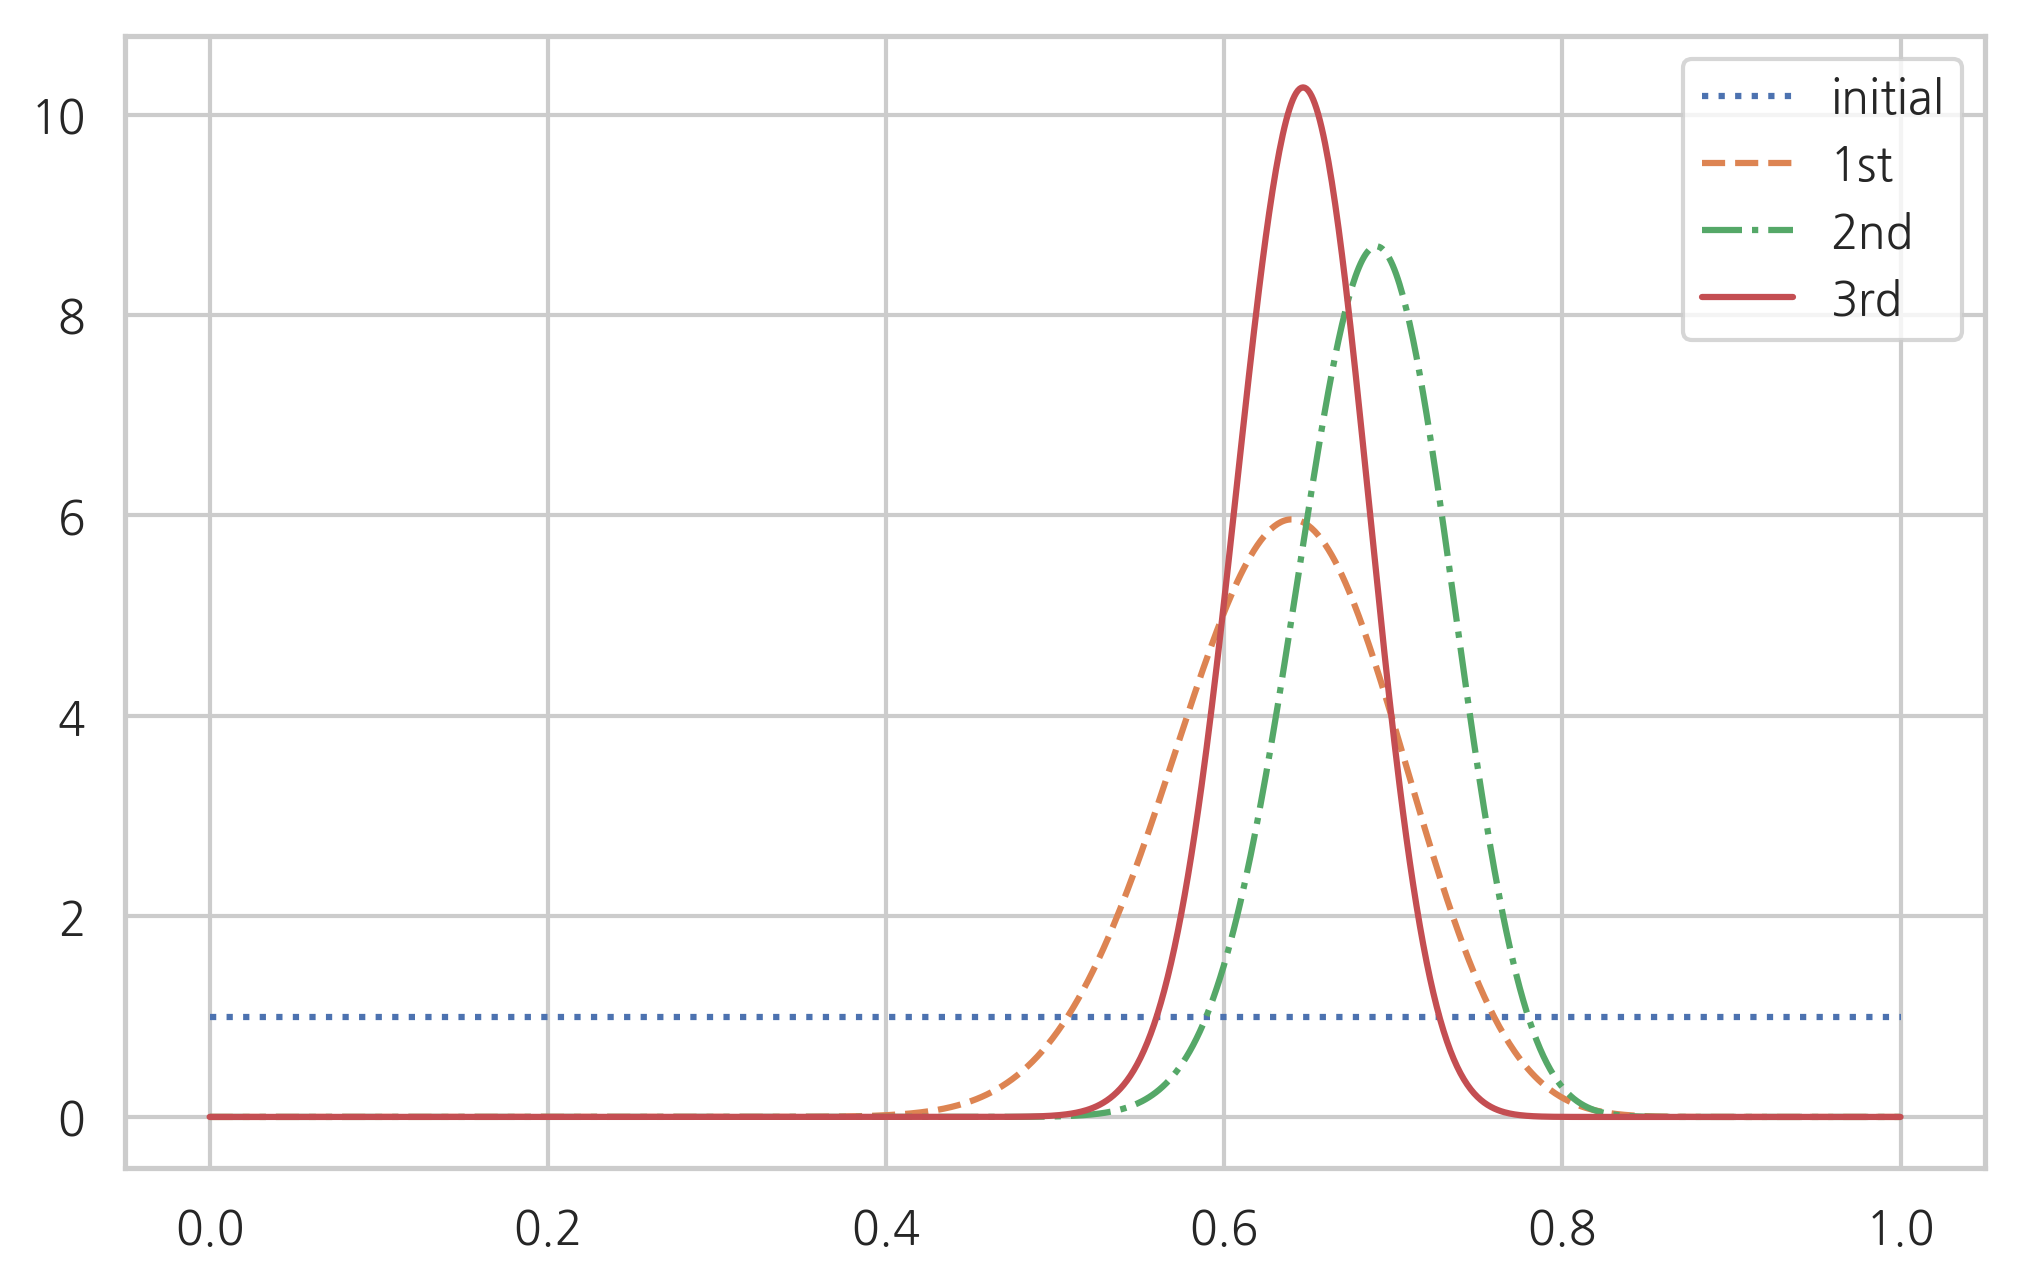

In [1]:
mu0 = 0.65
a0, b0 = 1, 1
print("step 0: mode = unknown")

xx = np.linspace(0, 1, 1000)
plt.plot(xx, sp.stats.beta(a0, b0).pdf(xx), ls=":", label="initial")

np.random.seed(0)
x = sp.stats.bernoulli(mu0).rvs(50)
N0, N1 = np.bincount(x, minlength=2)
a1, b1 = a0 + N1, b0 + N0
plt.plot(xx, sp.stats.beta(a1, b1).pdf(xx), ls="--", label="1st")
print("step 1: mode =", (a1 - 1)/(a1 + b1 - 2))

x = sp.stats.bernoulli(mu0).rvs(50)
N0, N1 = np.bincount(x, minlength=2)
a2, b2 = a1 + N1, b1 + N0
plt.plot(xx, sp.stats.beta(a2, b2).pdf(xx), ls="-.", label="2nd")
print("step 2: mode =", (a2 - 1)/(a2 + b2 - 2))

x = sp.stats.bernoulli(mu0).rvs(50)
N0, N1 = np.bincount(x, minlength=2)
a3, b3 = a2 + N1, b2 + N0
plt.plot(xx, sp.stats.beta(a3, b3).pdf(xx), ls="-", label="3rd")
print("step 3: mode =", (a3 - 1)/(a3 + b3 - 2))

plt.legend()
plt.show()

## 카테고리 분포의 모수 추정

다음으로 클래스 갯수가 $K$인 카테고리 분포의 모수 $\mu$ 벡터를 베이지안 추정법으로 추정해 보자.

카테고리 분포의 모수의 각 원소는 모두 0부터 1사이의 값을 가지므로 사전 분포는 하이퍼 모수 $\alpha_k=1$인 디리클리 분포라고 가정한다.

$$ P(\mu) \propto \prod_{k=1}^K \mu_k^{\alpha_k - 1} \;\;\; (\alpha_k = 1, \; \text{ for all } k) $$

데이터는 모두 독립적인 카테고리 분포의 곱이므로 가능도 함수는 다음처럼 다항 분포이다.

$$ P(x_{1},\ldots,x_{N} \mid \mu) = \prod_{i=1}^N  \prod_{k=1}^K \mu_k^{x_{i,k}} $$

베이즈 정리로 사후 분포를 구하면 다음과 같이 갱신된 하이퍼 모수 $\alpha'_i$를 가지는 디리클리 분포가 된다.

$$ 
\begin{eqnarray}
P(\mu \mid x_{1},\ldots,x_{N})
&\propto & P(x_{1},\ldots,x_{N} \mid \mu)  P(\mu) \\
&=& \prod_{i=1}^N  \prod_{k=1}^K \mu_k^{x_{i,k}} \cdot \prod_{k=1}^K \mu_k^{\alpha_k - 1}  \\
&=& \prod_{k=1}^K  \mu^{\sum_{i=1}^N x_{i,k} + \alpha_k − 1}   \\
&=& \prod_{k=1}^K  \mu^{N_k + \alpha_k −1}   \\
&=& \prod_{k=1}^K  \mu^{\alpha'_k −1}   \\
\end{eqnarray}
$$

이 경우에도 마찬가지로 디리클리분포는 켤레 분포임을 알 수 있다.
갱신된 하이퍼모수의 값은 다음과 같다.

$$ \alpha'_k = N_k + \alpha_k $$



In [2]:
def plot_dirichlet(alpha):

    def project(x):
        n1 = np.array([1, 0, 0])
        n2 = np.array([0, 1, 0])
        n3 = np.array([0, 0, 1])
        n12 = (n1 + n2)/2
        m1 = np.array([1, -1, 0])
        m2 = n3 - n12
        m1 = m1/np.linalg.norm(m1)
        m2 = m2/np.linalg.norm(m2)
        return np.dstack([(x-n12).dot(m1), (x-n12).dot(m2)])[0]

    def project_reverse(x):
        n1 = np.array([1, 0, 0])
        n2 = np.array([0, 1, 0])
        n3 = np.array([0, 0, 1])
        n12 = (n1 + n2)/2
        m1 = np.array([1, -1, 0])
        m2 = n3 - n12
        m1 = m1/np.linalg.norm(m1)
        m2 = m2/np.linalg.norm(m2)
        return x[:, 0][:, np.newaxis] * m1 + x[:, 1][:, np.newaxis] * m2 + n12

    eps = np.finfo(float).eps * 10
    X = project([[1-eps, 0, 0], [0, 1-eps, 0], [0, 0, 1-eps]])

    import matplotlib.tri as mtri

    triang = mtri.Triangulation(X[:, 0], X[:, 1], [[0, 1, 2]])
    refiner = mtri.UniformTriRefiner(triang)
    triang2 = refiner.refine_triangulation(subdiv=6)
    XYZ = project_reverse(
        np.dstack([triang2.x, triang2.y, 1-triang2.x-triang2.y])[0])

    pdf = sp.stats.dirichlet(alpha).pdf(XYZ.T)
    plt.tricontourf(triang2, pdf)
    plt.axis("equal")
    plt.show()

In [3]:
mu0 = np.array([0.3, 0.5, 0.2])

np.random.seed(0)
x1 = np.random.choice(3, 50, p=mu0)
N1 = np.bincount(x1, minlength=3)
x2 = np.random.choice(3, 50, p=mu0)
N2 = np.bincount(x2, minlength=3)
x3 = np.random.choice(3, 50, p=mu0)
N3 = np.bincount(x3, minlength=3)

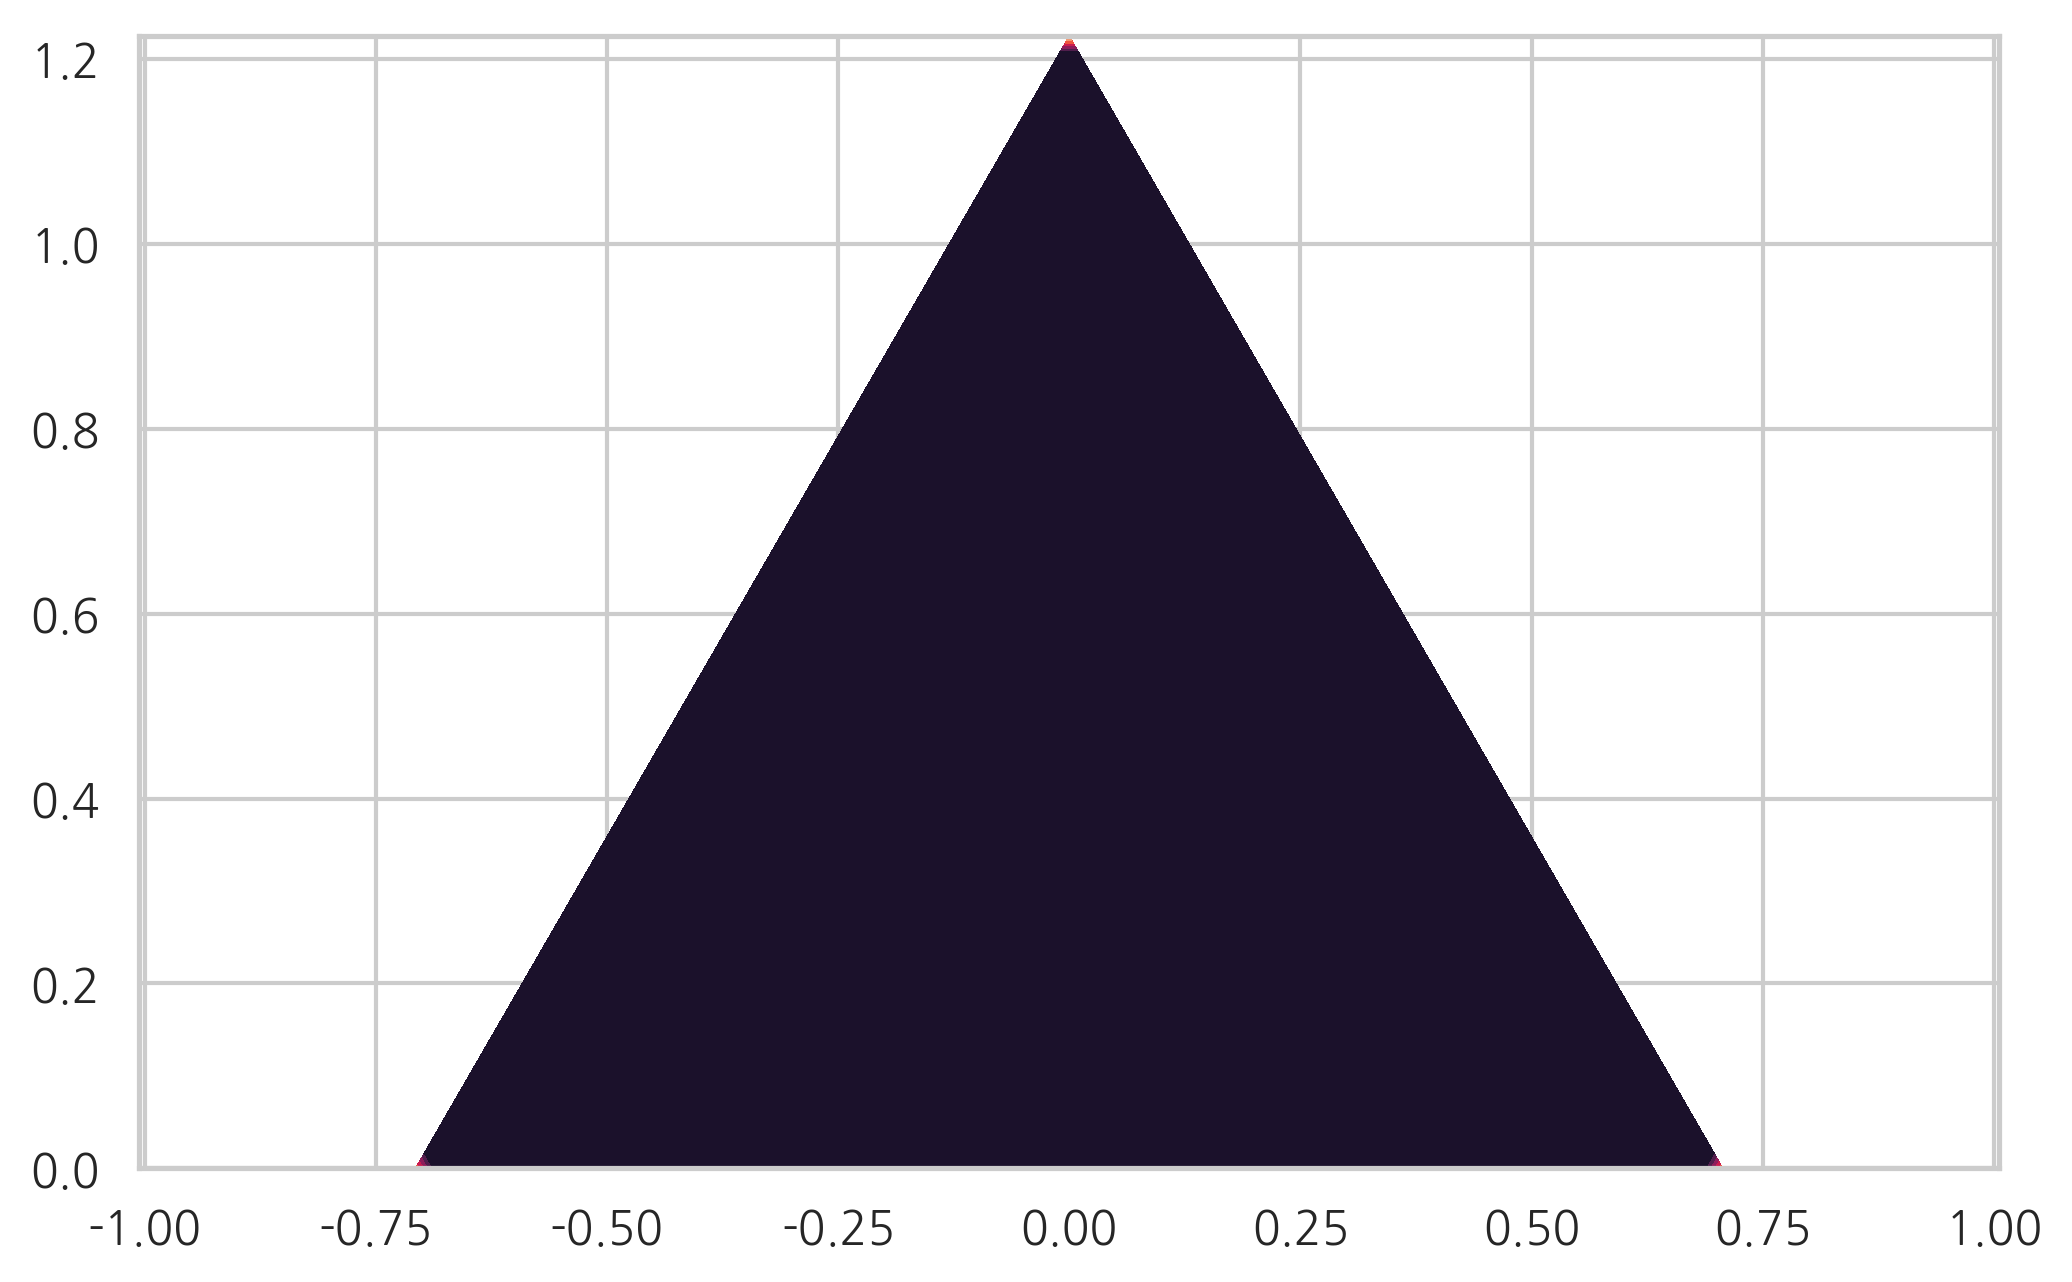

In [4]:
a0 = np.ones(3) / 3
plot_dirichlet(a0)

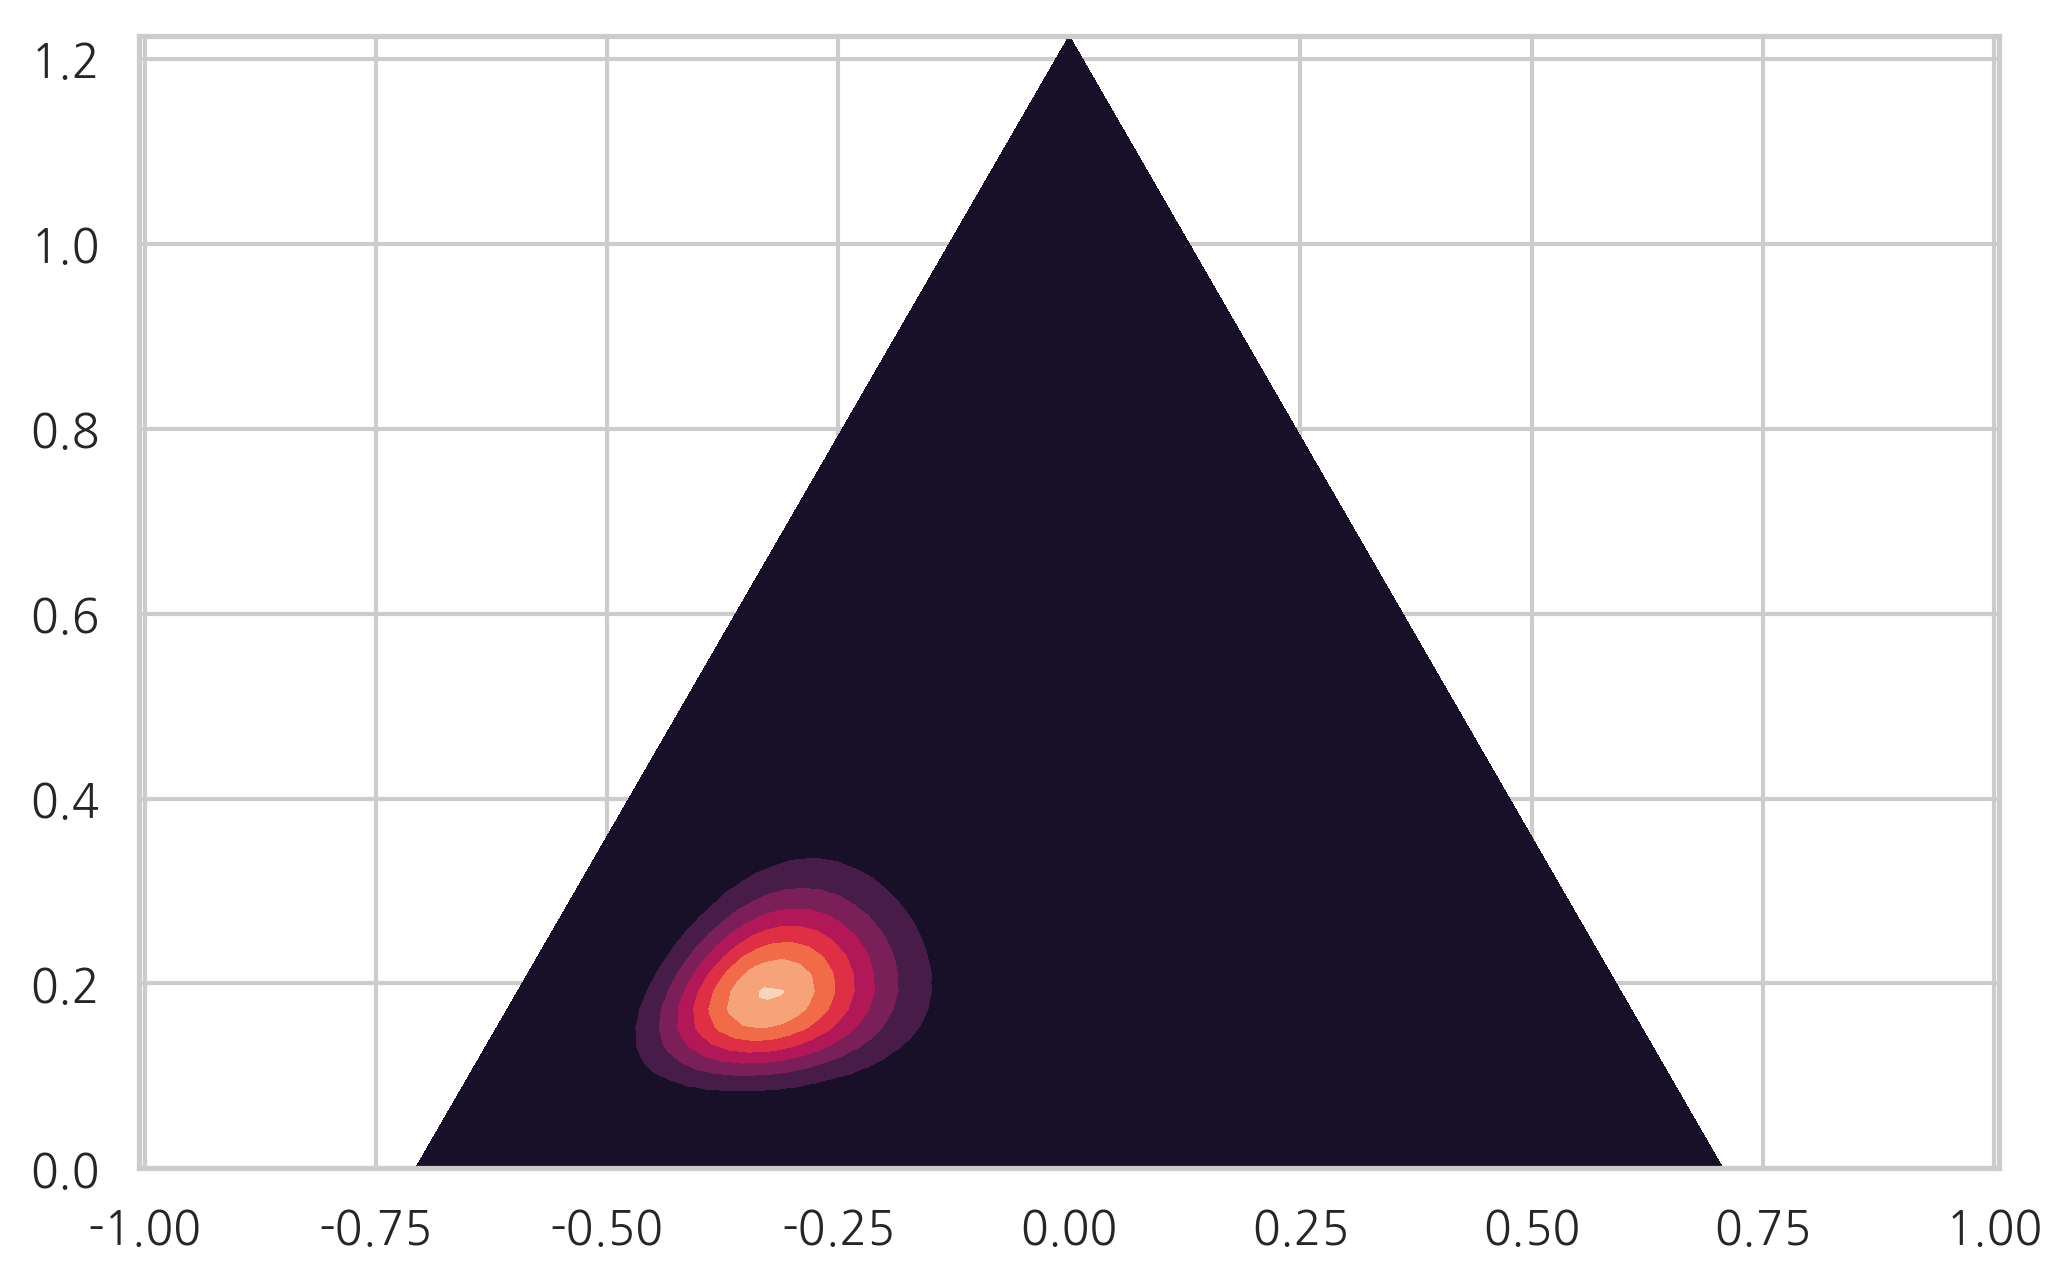

[0.19444444 0.65277778 0.15277778]


In [5]:
a1 = a0 + N1
plot_dirichlet(a1)
print((a1 - 1)/(a1.sum() - 3))

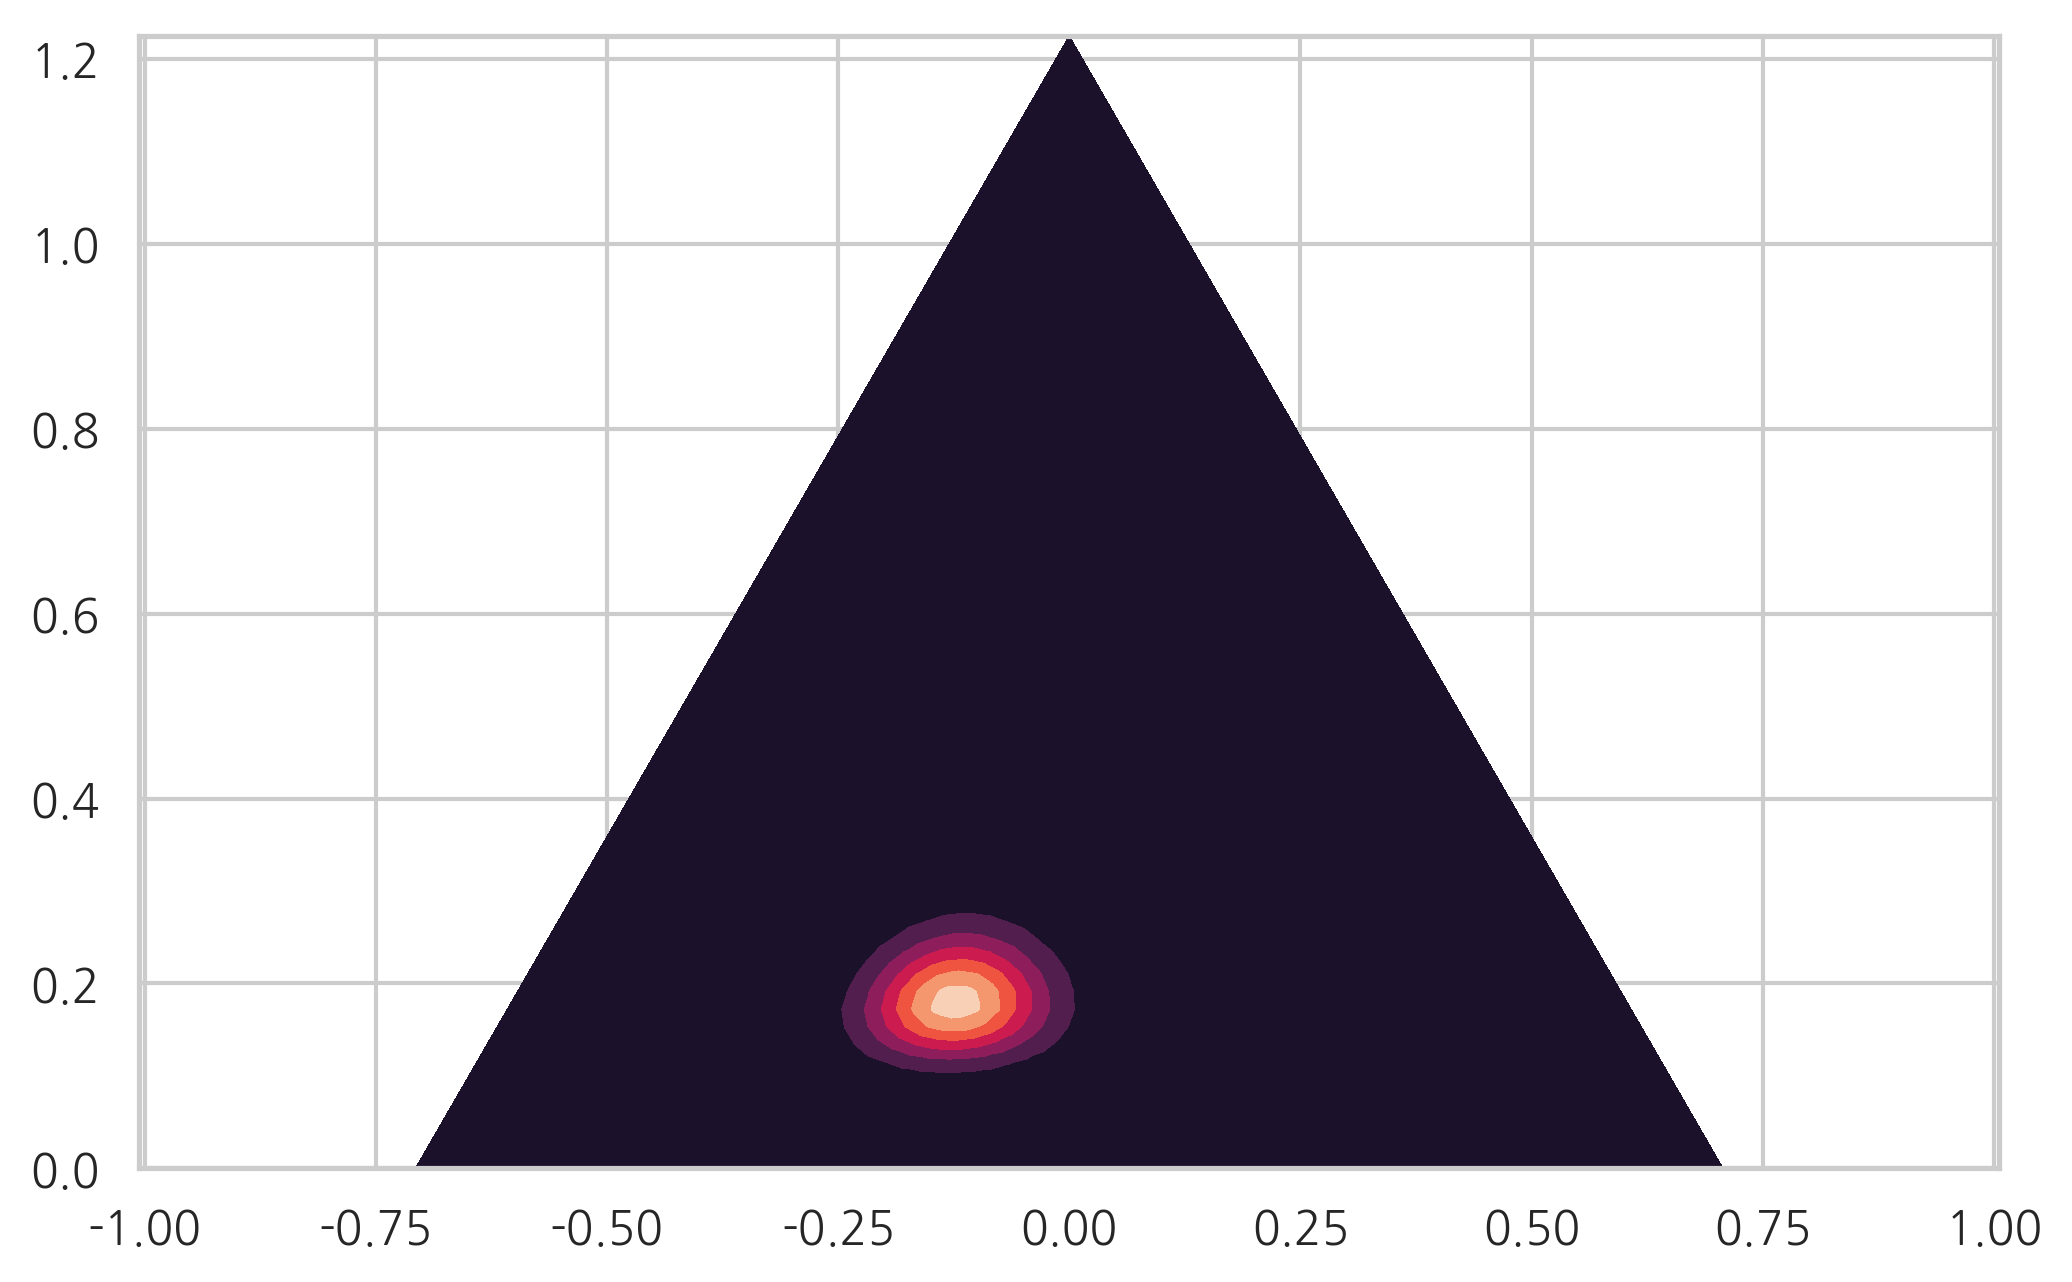

[0.34013605 0.51360544 0.1462585 ]


In [6]:
a2 = a1 + N2
plot_dirichlet(a2)
print((a2 - 1)/(a2.sum() - 3))

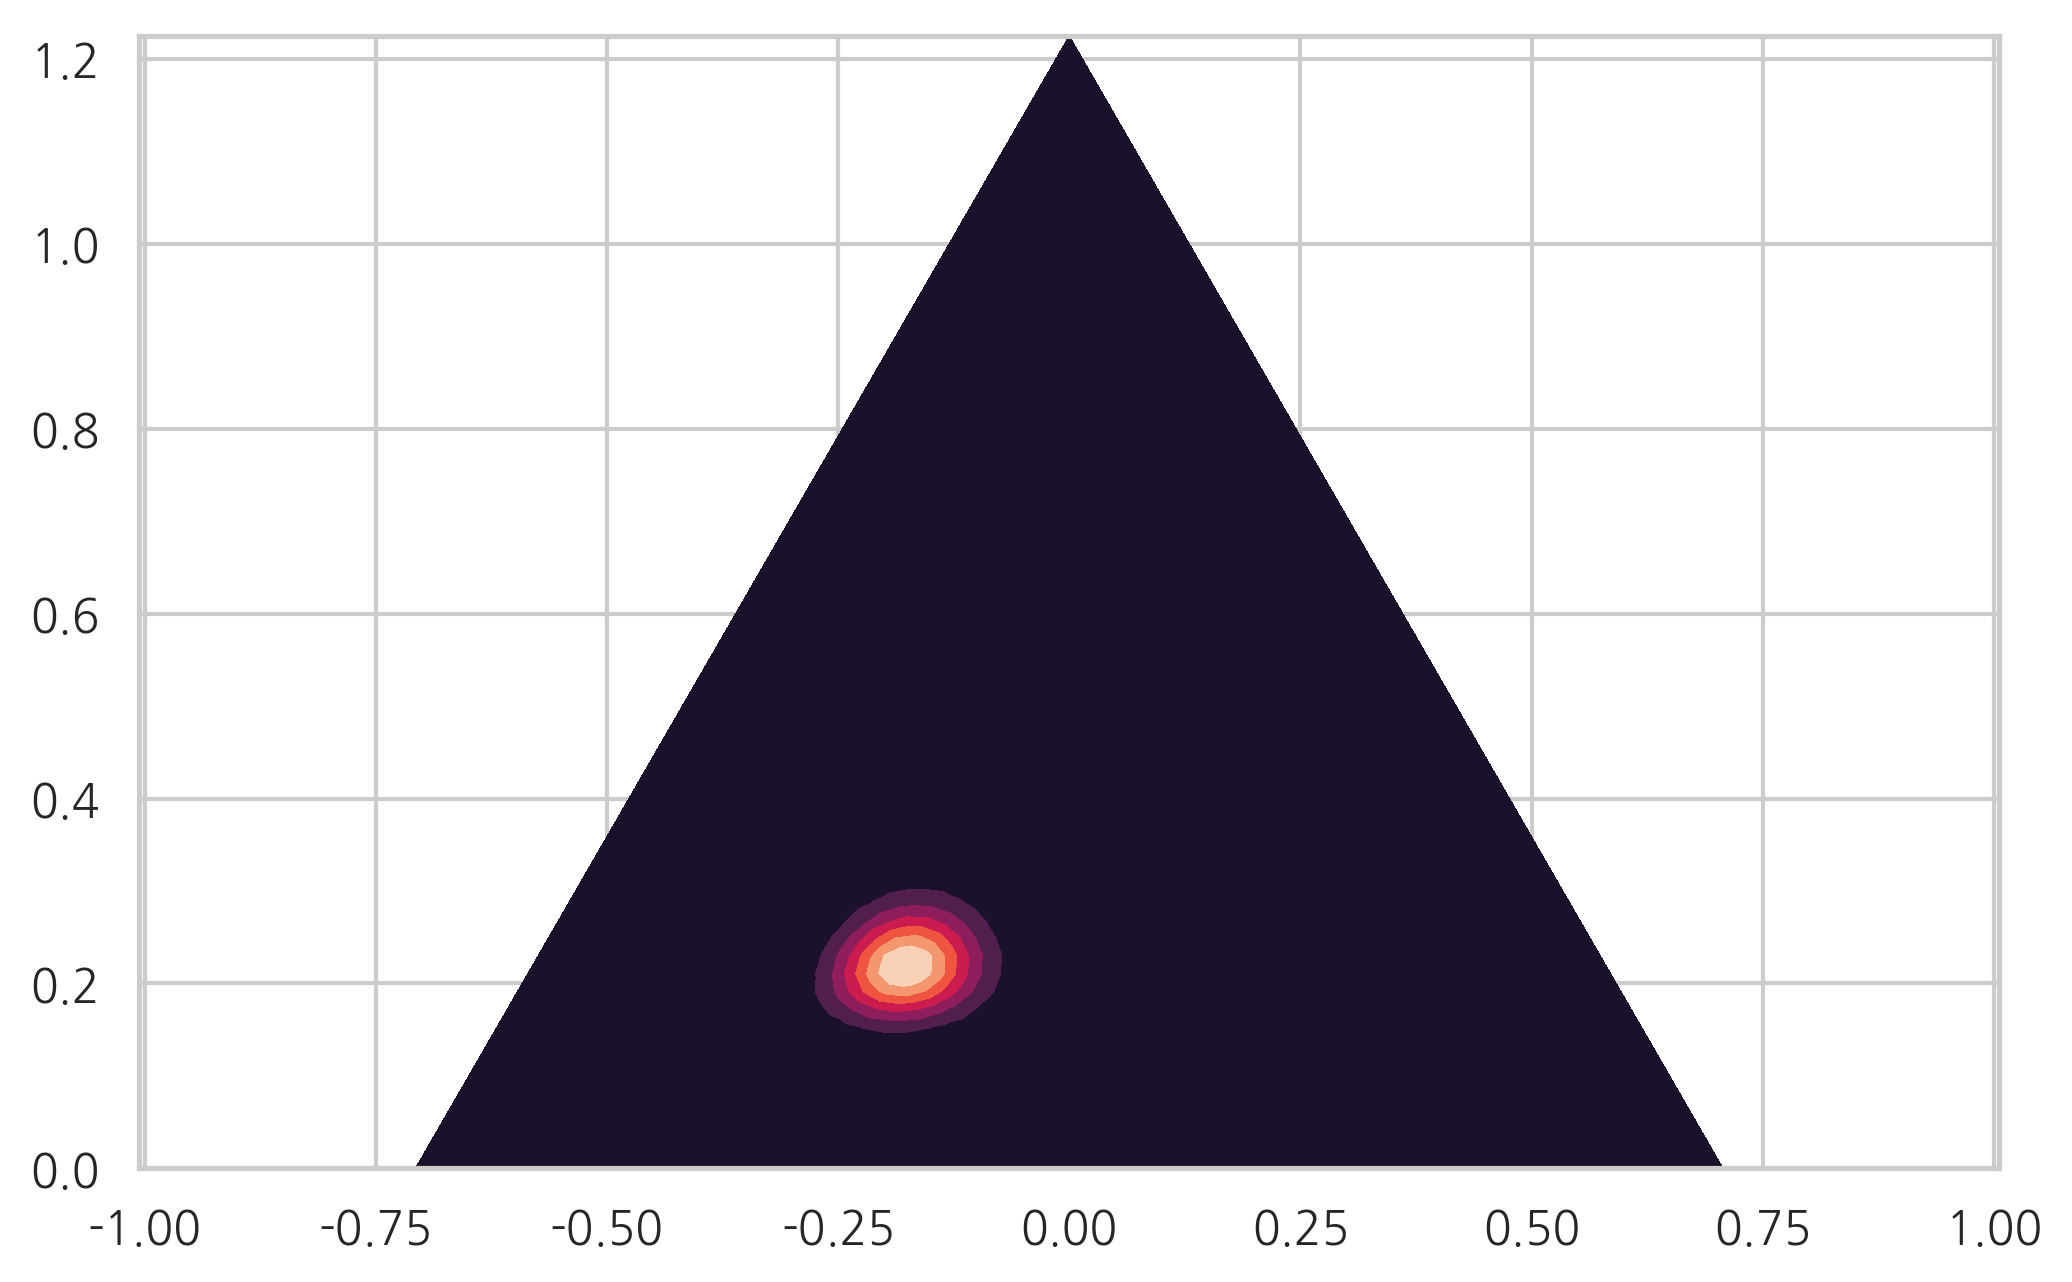

[0.28603604 0.53603604 0.17792793]


In [7]:
a3 = a2 + N3
plot_dirichlet(a3)
print((a3 - 1)/(a3.sum() - 3))

## 정규 분포의 기댓값 모수 추정

이번에는 정규 분포의 기댓값 모수를 베이지안 방법으로 추정한다. 분산 모수 $\sigma^2$은 알고 있다고 가정한다.

기댓값은 $-\infty$부터 $\infty$까지의 모든 수가 가능하기 때문에 모수의 사전 분포로는 정규 분포를 사용한다.

$$ P(\mu) = N(\mu_0, \sigma^2_0) = \dfrac{1}{\sqrt{2\pi\sigma_0^2}} \exp \left(-\dfrac{(\mu-\mu_0)^2}{2\sigma_0^2}\right)$$

데이터는 모두 독립적인 정규 분포의 곱이므로 가능도 함수는 다음과 같다.

$$ P(x_{1},\ldots,x_{N} \mid \mu) = \prod_{i=1}^N N(x_i \mid \mu )  = \prod_{i=1}^N  \dfrac{1}{\sqrt{2\pi\sigma^2}} \exp \left(-\dfrac{(x_i-\mu)^2}{2\sigma^2}\right)  $$

$$ 
\begin{eqnarray}
P(\mu \mid x_{1},\ldots,x_{N})  
&\propto & P(x_{1},\ldots,x_{N} \mid \mu) P(\mu) \\
&\propto & \exp \left(-\dfrac{(\mu-\mu'_0)^2}{2\sigma_0^{'2}}\right) \\
\end{eqnarray}
$$

베이즈 정리를 이용하여 사후 분포를 구하면 다음과 같이 갱신된 하이퍼 모수를 가지는 정규 분포가 된다.

$$
\begin{eqnarray}
\mu'_0 &=& \dfrac{\sigma^2}{N\sigma_0^2 + \sigma^2}\mu_0 + \dfrac{N\sigma_0^2}{N\sigma_0^2 + \sigma^2} \dfrac{\sum x_i}{N} \\
\dfrac{1}{\sigma_0^{'2}} &=& \dfrac{1}{\sigma_0^{2}} + \dfrac{N}{\sigma^{'2}}
\end{eqnarray}
$$


1.9819993262158315
1.9805846303216201
2.0701788542914947
2.0303044050403543


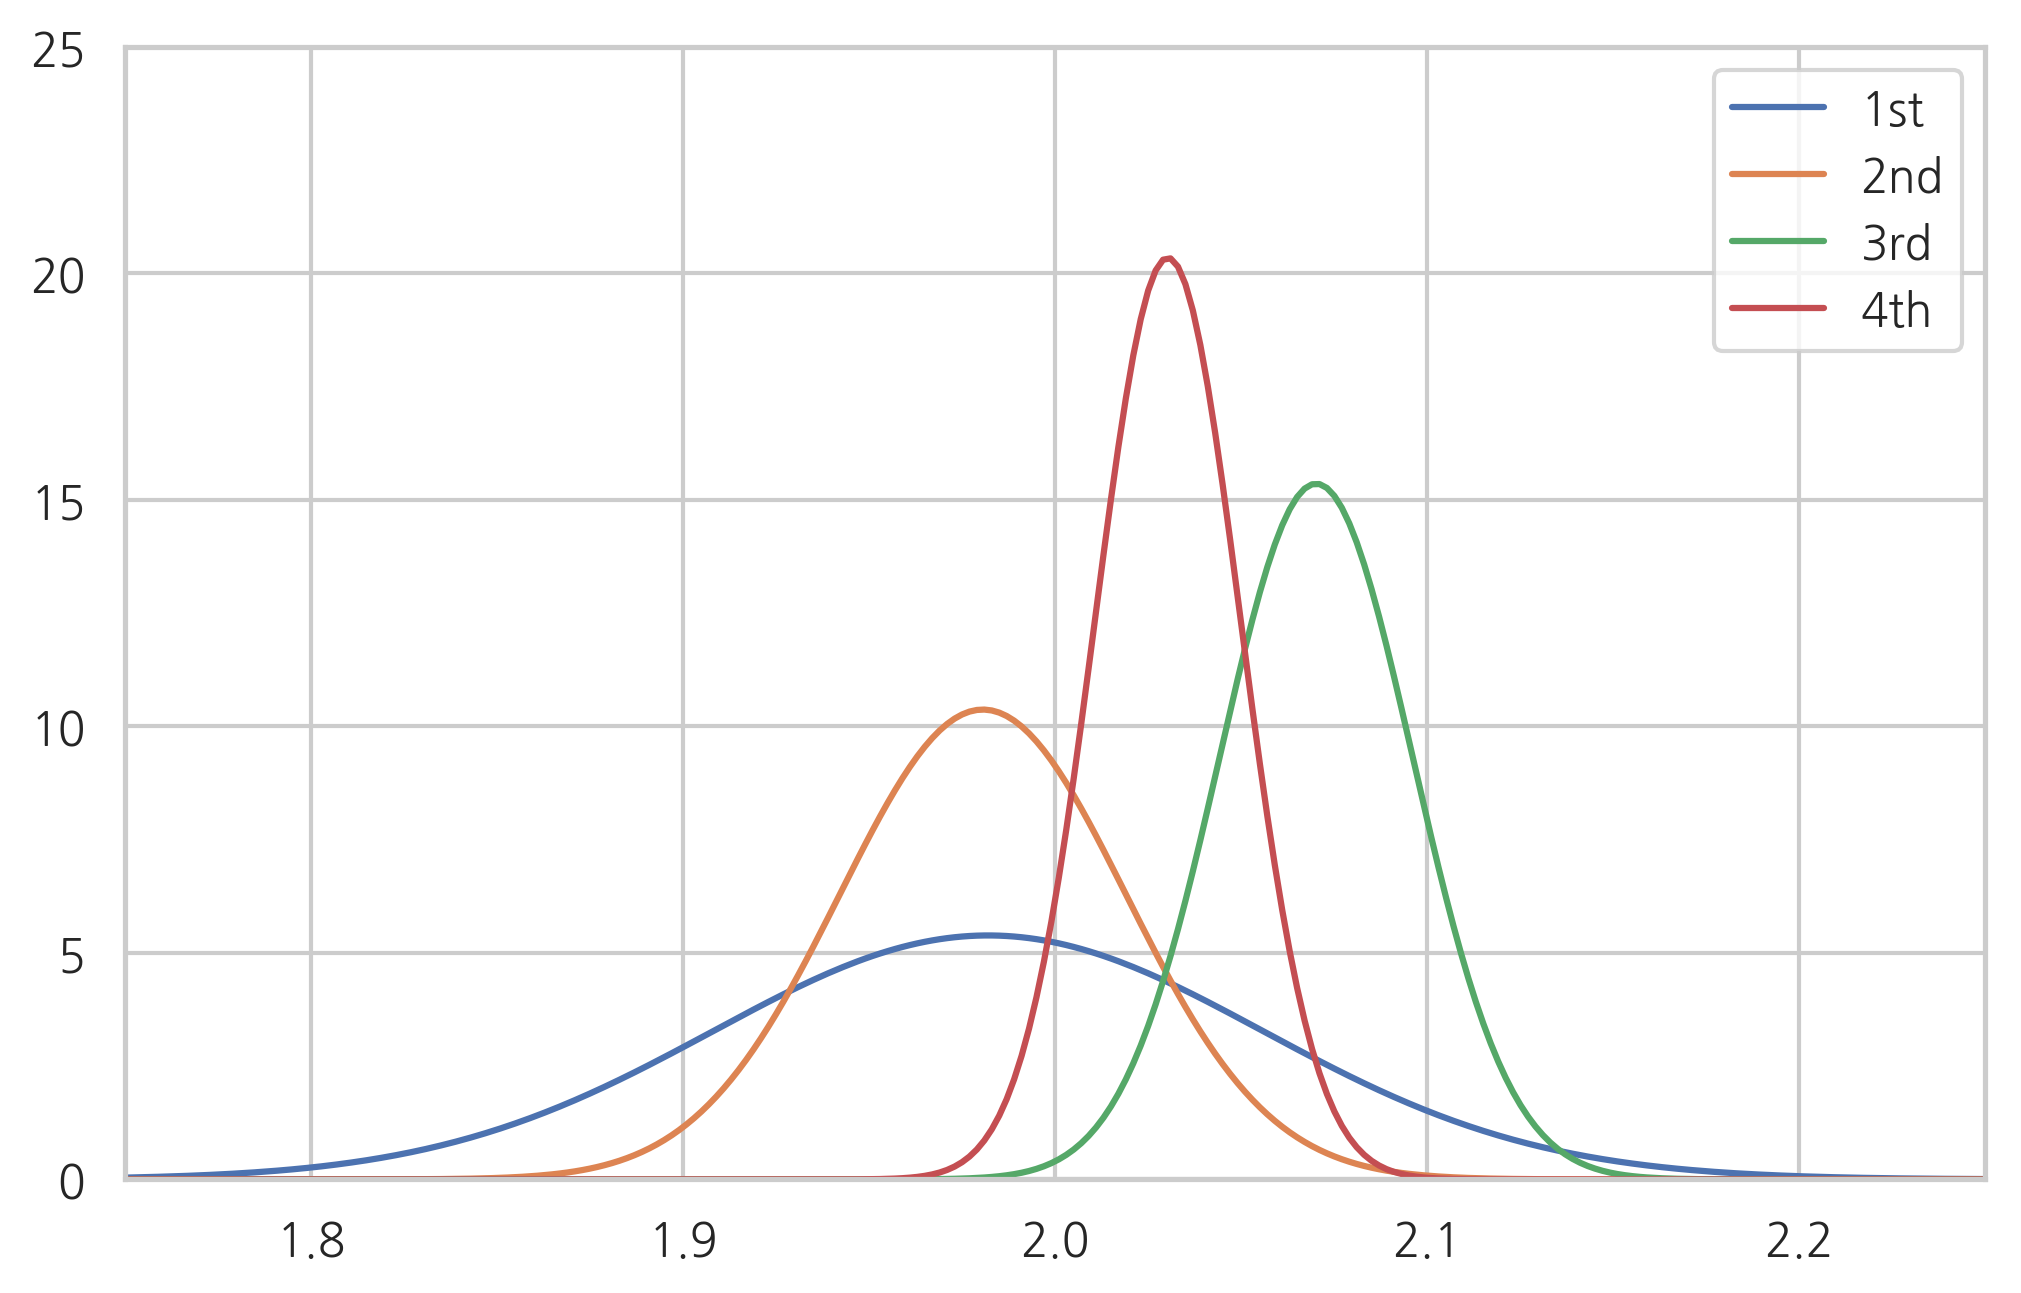

In [8]:
mu, sigma2 = 2, 4

mu0, sigma20 = 0, 1
xx = np.linspace(1, 3, 1000)

np.random.seed(0)

N = 50
x = sp.stats.norm(mu).rvs(N)
mu0 = sigma2/(N*sigma20 + sigma2) * mu0 + \
    (N*sigma20)/(N*sigma20 + sigma2)*x.mean()
sigma20 = 1/(1/sigma20 + N/sigma2)
plt.plot(xx, sp.stats.norm(mu0, sigma20).pdf(xx), label="1st")
print(mu0)

N = 50
x = sp.stats.norm(mu).rvs(N)
mu0 = sigma2/(N*sigma20 + sigma2) * mu0 + \
    (N*sigma20)/(N*sigma20 + sigma2)*x.mean()
sigma20 = 1/(1/sigma20 + N/sigma2)
plt.plot(xx, sp.stats.norm(mu0, sigma20).pdf(xx), label="2nd")
print(mu0)

N = 50
x = sp.stats.norm(mu).rvs(N)
mu0 = sigma2/(N*sigma20 + sigma2) * mu0 + \
    (N*sigma20)/(N*sigma20 + sigma2)*x.mean()
sigma20 = 1/(1/sigma20 + N/sigma2)
plt.plot(xx, sp.stats.norm(mu0, sigma20).pdf(xx), label="3rd")
print(mu0)

N = 50
x = sp.stats.norm(mu).rvs(N)
mu0 = sigma2/(N*sigma20 + sigma2) * mu0 + \
    (N*sigma20)/(N*sigma20 + sigma2)*x.mean()
sigma20 = 1/(1/sigma20 + N/sigma2)
plt.plot(xx, sp.stats.norm(mu0, sigma20).pdf(xx), label="4th")
print(mu0)

plt.axis([1.75, 2.25, 0, 25])
plt.legend()
plt.show()